# 0283. Move Zeroes

| **Author** | **Last Updated** | **Difficulty** | **Tags** |
| :--- | :--- | :--- | :--- |
| MD Saifullah Baig.A | 06.01.2026 | 🟢 Easy | Array, Two Pointers |

**Problem Link:** [LeetCode 0283](https://leetcode.com/problems/move-zeroes/)

---

## 1. Problem Statement
Given an integer array `nums`, move all `0`'s to the end of it while maintaining the relative order of the non-zero elements.

**Note** that you must do this in-place without making a copy of the array.

**Example:**
```text
Input: nums = [0,1,0,3,12]
Output: [1,3,12,0,0]

## 2. Approach Overview

### 🎯 Approach 3: Two Pointer (Swap - Optimal One Pass)

> 💡 **My Breakthrough Realization:** > While the "Overwrite & Fill" method is good, I realized it iterates through the array twice (once to move, once to fill zeros). 
> 
> I asked myself: **"Can I do this in a single pass?"**
> 
> Instead of just overwriting, what if I **swap** the non-zero elements with the zero elements? This way, the non-zeros move forward and the zeros naturally "bubble" to the back in one go!

This approach uses a "Slow Pointer" and a "Fast Pointer" to partition the array. The slow pointer marks the boundary between the non-zero section and the zero section.

#### Key Idea:
1.  **Partitioning:** We want all non-zeros on the left and all zeros on the right.
2.  **Pointers:**
    * `i` (Slow): Points to the first zero (or the position where the next non-zero belongs).
    * `j` (Fast): Scans the array looking for non-zero elements.
3.  **The Swap:** Whenever `j` finds a non-zero, we swap it with `nums[i]`.
4.  **Result:** Non-zeros are pushed to the front, and we finish in exactly one traversal.

#### 🎨 Visual Walkthrough

Let's trace `nums = [0, 1, 0, 3, 12]`:

> **The Concept:**
> ```
> i (Slow): "I am waiting for a non-zero to swap with."
> j (Fast): "I am looking for non-zeros."
> ```

> **Step-by-Step Execution:**
> ```
> Initial: [0, 1, 0, 3, 12], i=0
> 
> j=0: nums[0] is 0.
>      (Do nothing. We need a non-zero.)
>      [0, 1, 0, 3, 12]
>       ↑  ↑
>       i  j
> 
> j=1: nums[1] is 1 (Non-Zero!) -> SWAP with nums[i]
>      Swap nums[1] and nums[0]
>      Increment i
>      [1, 0, 0, 3, 12]
>          ↑     ↑
>          i     j
> 
> j=2: nums[2] is 0.
>      (Do nothing.)
>      [1, 0, 0, 3, 12]
>          ↑        ↑
>          i        j
> 
> j=3: nums[3] is 3 (Non-Zero!) -> SWAP with nums[i]
>      Swap nums[3] and nums[1]
>      Increment i
>      [1, 3, 0, 0, 12]
>             ↑        ↑
>             i        j
> 
> j=4: nums[4] is 12 (Non-Zero!) -> SWAP with nums[i]
>      Swap nums[4] and nums[2]
>      Increment i
>      [1, 3, 12, 0, 0] ✓
>                 ↑           ↑
>                 i           j
> ```

> **Why This Works:**
> ```
> [1, 3, 12 | 0, 0]
>  Non-Zeros  Zeros
>           ↑
>           i (Boundary)
> 
> By swapping, we maintain the invariant that everything before 'i' is non-zero.
> ```

#### Logic Breakdown:
* **Step 1:** Initialize slow pointer `i = 0`.
* **Step 2:** Loop fast pointer `j` from `0` to `N-1`.
* **Step 3:** Check condition: If `nums[j] != 0`:
    * **Swap:** `nums[i], nums[j] = nums[j], nums[i]`
    * **Advance:** Increment `i` to prepare for the next non-zero.
* **Step 4:** Return. The array is sorted in-place.

#### 📈 Complexity Analysis

**Time Complexity:** $O(N)$
- 🟢 **One Pass:** We traverse the array exactly once with the `j` pointer.
- 🟢 **Operations:** Each element is processed constant times.

**Space Complexity:** $O(1)$
- ✅ **In-Place:** We only use two integer variables (`i` and `j`). No extra memory.

#### ⚡ Performance Comparison

Comparing against the Two-Pass approach:

| Aspect | Overwrite (Two Pass) | Swap (One Pass) | Winner |
|:---|:---|:---|:---|
| Time Complexity | $O(N)$ | $O(N)$ | 🤝 Tie |
| Iterations | 2 (Scan + Fill) | 1 (Scan & Swap) | 🚀 Swap |
| Writes (Worst Case) | $N$ writes | $N$ swaps | 🐢 Overwrite |
| Logic Simplicity | Very Simple | Slight "Swap" logic | 🤝 Tie |

**The Impact:** This is the most "professional" way to solve the problem. It minimizes code lines and traverses the data only once, which can be cache-friendlier on very large arrays.

#### Verdict:
✅ **Optimal & Clean** — This is the industry-standard solution. It combines the logic of finding elements and placing them into a single, elegant loop.


In [1]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        i,j=0,0
        for j in range(len(nums)):
            if nums[j]!=0:
                nums[j],nums[i]=nums[i],nums[j]
                i+=1
        return nums

In [2]:
solution=Solution()
l=[0,1,0,3,12]
solution.moveZeroes(l)

[1, 3, 12, 0, 0]

Running benchmark for 3 approaches...

Benchmark Results (Seconds):
        N  Brute Force  Two Pass  Two Pointers
0    1000     0.000058  0.000058      0.000053
1    5000     0.000271  0.000290      0.000269
2   10000     0.000515  0.000584      0.000546
3   50000     0.002639  0.002943      0.002761
4  100000     0.005286  0.006038      0.005492
5  200000     0.010186  0.011878      0.011304


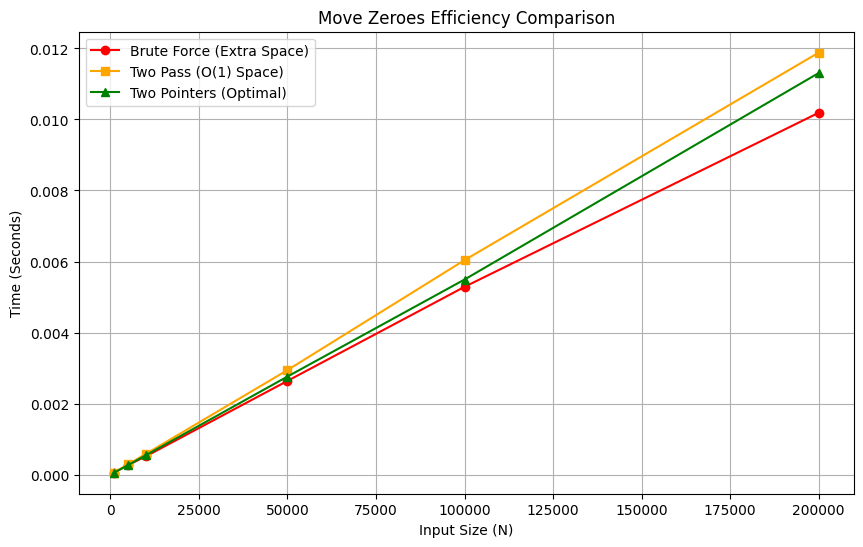

In [ ]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import copy

class Solution:
    # 1. Brute Force (O(N) Space)
    def moveZeroes_brute(self, nums: List[int]) -> None:
        temp_non_zeros = []
        for num in nums:
            if num != 0:
                temp_non_zeros.append(num)
        
        for i in range(len(temp_non_zeros)):
            nums[i] = temp_non_zeros[i]
            
        for i in range(len(temp_non_zeros), len(nums)):
            nums[i] = 0

    # 2. Two Pass (O(1) Space, 2 Iterations)
    def moveZeroes_two_pass(self, nums: List[int]) -> None:
        insert_pos = 0
        for i in range(len(nums)):
            if nums[i] != 0:
                nums[insert_pos] = nums[i]
                insert_pos += 1
        
        for i in range(insert_pos, len(nums)):
            nums[i] = 0

    # 3. Two Pointers (O(1) Space, 1 Iteration - Optimal)
    def moveZeroes_optimal(self, nums: List[int]) -> None:
        l = 0
        for r in range(len(nums)):
            if nums[r] != 0:
                nums[l], nums[r] = nums[r], nums[l]
                l += 1

def run_benchmark():
    solution = Solution()
    
    # Input sizes to test
    input_sizes = [1000, 5000, 10000, 50000, 100000, 200000]
    results = []

    print("Running benchmark for 3 approaches...")
    
    for n in input_sizes:
        # Generate random array with ~50% zeros to stress test the swapping/moving logic
        original_nums = [0 if random.random() < 0.5 else random.randint(1, 100) for _ in range(n)]
        
        # Create copies for each method since they modify in-place
        nums_1 = copy.deepcopy(original_nums)
        nums_2 = copy.deepcopy(original_nums)
        nums_3 = copy.deepcopy(original_nums)

        # 1. Measure Brute Force
        start = time.time()
        solution.moveZeroes_brute(nums_1)
        t_brute = time.time() - start

        # 2. Measure Two Pass
        start = time.time()
        solution.moveZeroes_two_pass(nums_2)
        t_two_pass = time.time() - start

        # 3. Measure Two Pointers (Optimal)
        start = time.time()
        solution.moveZeroes_optimal(nums_3)
        t_optimal = time.time() - start

        results.append({
            "N": n,
            "Brute Force": t_brute,
            "Two Pass": t_two_pass,
            "Two Pointers": t_optimal
        })

    # Create DataFrame
    df = pd.DataFrame(results)
    print("\nBenchmark Results (Seconds):")
    print(df)

    # Plotting
    plt.figure(figsize=(10, 6))
    
    plt.plot(df["N"], df["Brute Force"], label='Brute Force (Extra Space)', marker='o', color='red')
    plt.plot(df["N"], df["Two Pass"], label='Two Pass (O(1) Space)', marker='s', color='orange')
    plt.plot(df["N"], df["Two Pointers"], label='Two Pointers (Optimal)', marker='^', color='green')
    
    plt.title('Move Zeroes Efficiency Comparison')
    plt.xlabel('Input Size (N)')
    plt.ylabel('Time (Seconds)')
    plt.legend()
    plt.grid(True)
    
    # Save the plot
    plt.savefig('efficiency_graph.png')
    plt.show()

if __name__ == "__main__":
    run_benchmark()